In [1]:
%pip install pydot --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.build(input_shape = (None, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Using Functional API

inputs = keras.Input(shape = (4,), name = "Input 1")
features = layers.Dense(64, activation = 'relu')(inputs)
outputs = layers.Dense(10, activation = 'sigmoid')(features)
model = keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input 1 (InputLayer)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 970 (3.79 KB)

 Trainable params: 970 (3.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
vocab_size = 1000
num_departments = 6

title = keras.Input(shape=(vocab_size, ), name = "Title")
tag = keras.Input(shape=(vocab_size, ), name = "Tag")
caption = keras.Input(shape=(vocab_size, ), name = "Caption")

features = layers.Concatenate()([title, tag, caption])
features = layers.Dense(64, activation = 'relu')(features)

priority = layers.Dense(1, activation = 'sigmoid', name = "Priority")(features)
departments = layers.Dense(num_departments, activation = 'softmax', name = "Deparments")(features)
model = keras.Model(inputs = [title, tag, caption], outputs = [priority, departments])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Title (InputLayer)            │ (None, 1000)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Tag (InputLayer)              │ (None, 1000)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Caption (InputLayer)          │ (None, 1000)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 3000)              │               0 │ Title[0][0], Tag[0][0],    │
│                               │                           │                 │ Caption[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 64)                │         192,064 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Priority (Dense)              │ (None, 1)                 │              65 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Deparments (Dense)            │ (None, 6)                 │             390 │ dense_4[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 192,519 (752.03 KB)

 Trainable params: 192,519 (752.03 KB)

 Non-trainable params: 0 (0.00 B)

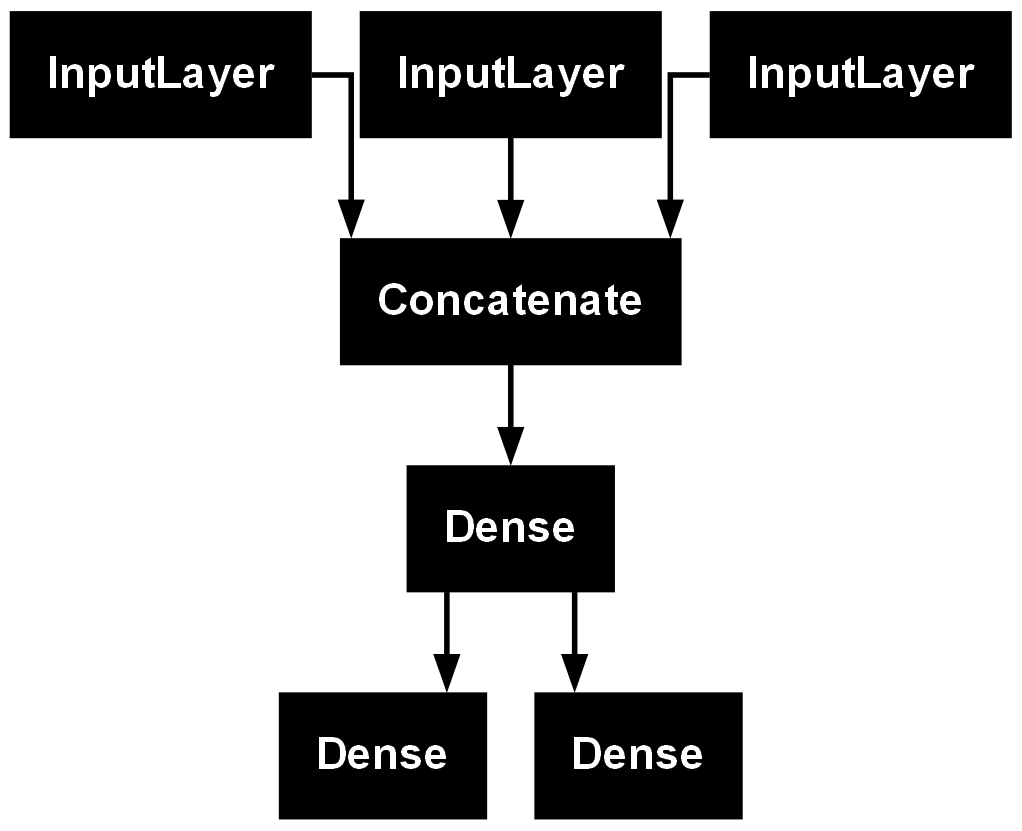

In [6]:
keras.utils.plot_model(model, "ticket_classifier.png")

In [7]:
num_samples = 1000

title_data = np.random.randint(0,2, size = (num_samples, vocab_size))
tag_data = np.random.randint(0,2, size = (num_samples, vocab_size))
caption_data = np.random.randint(0,2, size = (num_samples, vocab_size))

priority_data = np.random.random(size = (num_samples,1))
department_data = np.random.randint(0,2,size = (num_samples,num_departments))

model.compile(optimizer ='rmsprop', loss = ['mean_squared_error', 'categorical_crossentropy'], metrics = [['mean_absolute_error'], ['accuracy']])
model.fit([title_data, tag_data, caption_data], [priority_data, department_data], epochs = 1)
model.evaluate([title_data, tag_data, caption_data], [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, tag_data, caption_data])

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Deparments_accuracy: 0.1941 - Deparments_loss: 9.8553 - Priority_loss: 0.1662 - Priority_mean_absolute_error: 0.3307 - loss: 10.0286  
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Deparments_accuracy: 0.1347 - Deparments_loss: 6.8180 - Priority_loss: 0.2295 - Priority_mean_absolute_error: 0.4007 - loss: 7.0475  
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


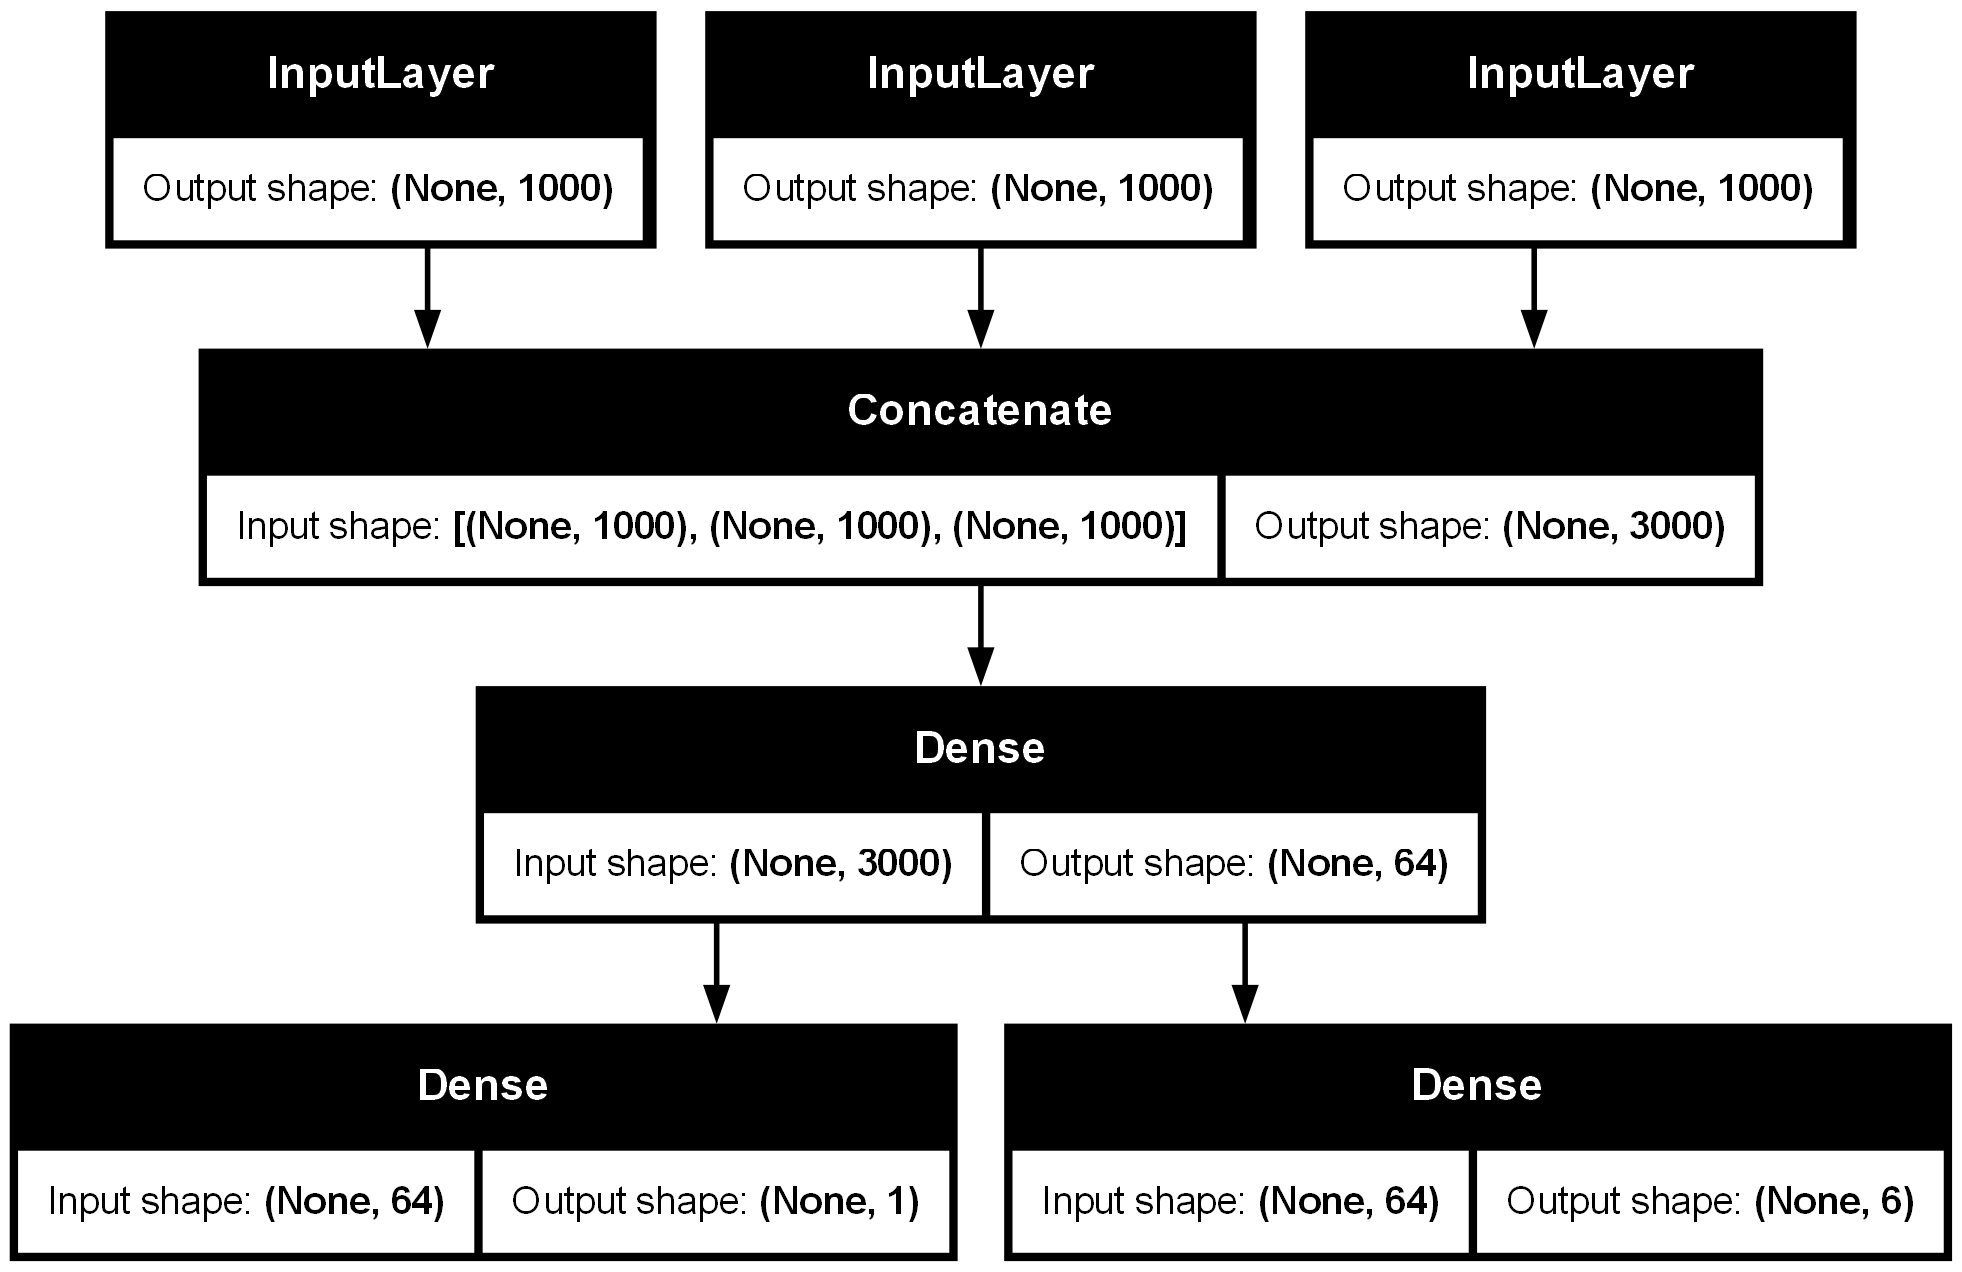

In [8]:
keras.utils.plot_model(model, "ticket_classifier2.png", show_shapes = True)

In [9]:
model.layers

[<InputLayer name=Title, built=True>,
 <InputLayer name=Tag, built=True>,
 <InputLayer name=Caption, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=Priority, built=True>,
 <Dense name=Deparments, built=True>]

In [10]:
#Building MNIST Model using Functional API
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape = (28*28,), name = "MNIST Input")
    features = layers.Dense(512, activation = 'relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation = 'softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data.reshape((60000, 28*28)).astype('float32')/255
test_data = test_data.reshape((10000, 28*28)).astype('float32')/255
train_data, val_data = train_data[10000:], train_data[:10000]
train_labels, val_labels = train_labels[10000:], train_labels[:10000]

model = get_mnist_model()
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_data, train_labels, epochs = 3, validation_data = (val_data, val_labels))
test_metrics = model.evaluate(test_data, test_labels)
predictions = model.predict(test_data)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8638 - loss: 0.4471 - val_accuracy: 0.9543 - val_loss: 0.1552
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9534 - loss: 0.1624 - val_accuracy: 0.9673 - val_loss: 0.1146
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9624 - loss: 0.1263 - val_accuracy: 0.9732 - val_loss: 0.0957
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.9723 - loss: 0.1047
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step


In [11]:
#Writing our Own Metrics

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name = 'rmse', **kwargs):
        super().__init__(name = name, **kwargs)
        self.mse_sum = self.add_weight(name = "mse_sum", initializer = "zeros")
        self.total_samples = self.add_weight(name = "total_samples", initializer = "zeros", dtype = "int32")

    def update_state(self, y_true, y_pred, sample_weight = None):
        y_true = tf.one_hot(y_true, depth = tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        mse = self.mse_sum / tf.cast(self.total_samples, tf.float32)
        return tf.sqrt(mse)

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [12]:
model = get_mnist_model()
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy', RootMeanSquaredError()]
)
model.fit(train_data, train_labels, epochs = 3, validation_data = (val_data, val_labels))
test_metrics = model.evaluate(test_data, test_labels)
predictions = model.predict(test_data)
predictions

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8649 - loss: 0.4456 - rmse: 0.4375 - val_accuracy: 0.9551 - val_loss: 0.1552 - val_rmse: 0.2633
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9499 - loss: 0.1719 - rmse: 0.2763 - val_accuracy: 0.9643 - val_loss: 0.1269 - val_rmse: 0.2354
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9605 - loss: 0.1328 - rmse: 0.2440 - val_accuracy: 0.9715 - val_loss: 0.1045 - val_rmse: 0.2099
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9684 - loss: 0.1126 - rmse: 0.2209
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step


array([[5.0583881e-11, 1.3244410e-11, 1.7043359e-07, ..., 9.9999976e-01,
        3.9404691e-11, 6.8715260e-09],
       [1.3884841e-09, 2.0297968e-08, 9.9999666e-01, ..., 1.4919239e-16,
        2.3283054e-08, 1.3996827e-18],
       [7.5799801e-07, 9.9978501e-01, 1.6452812e-05, ..., 9.0277666e-05,
        3.1377738e-05, 9.1477631e-07],
       ...,
       [3.4186690e-14, 1.3115039e-11, 6.6902045e-13, ..., 2.0404360e-07,
        8.9835503e-08, 8.0722049e-07],
       [1.2937743e-07, 7.0789179e-09, 1.1635237e-09, ..., 2.7133871e-09,
        5.3798845e-05, 4.3328857e-10],
       [2.0910566e-10, 3.3622302e-15, 8.4189784e-09, ..., 3.9997115e-16,
        4.5945900e-15, 3.8873620e-15]], dtype=float32)

In [13]:
model.summary()

print(f"The accuracy of the model on test data is {test_metrics[1] * 100}")

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MNIST Input (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

The accuracy of the model on test data is 97.2599983215332


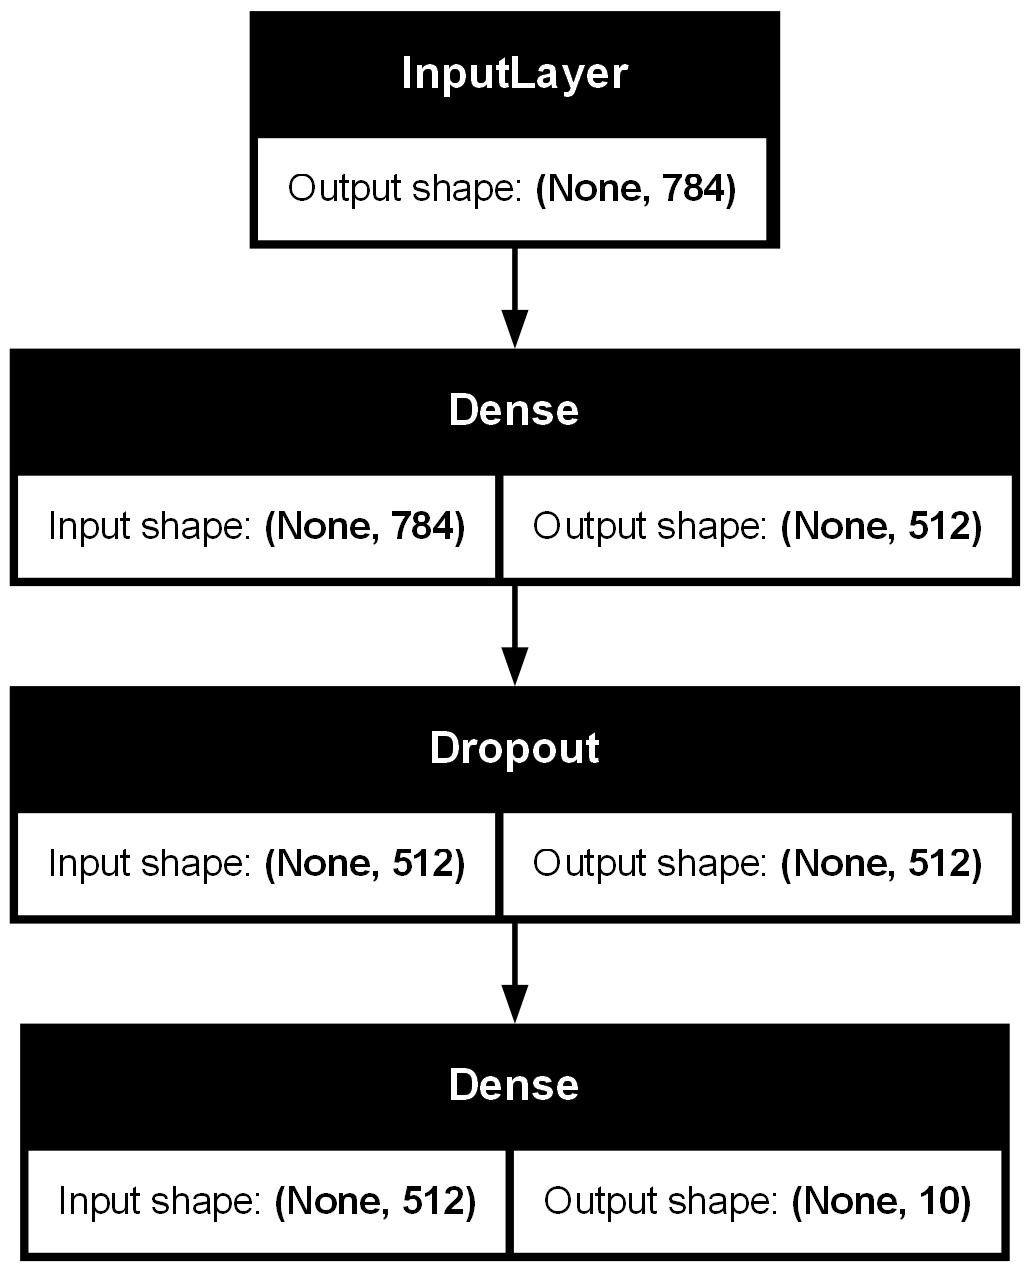

In [14]:
keras.utils.plot_model(model, "custom_metric.png", show_shapes = True)

In [15]:
#Using callbacks like EarlyStopping and ModelCheckPoints
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = "val_accuracy",
        patience = 2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = "checkpoint_path.keras",
        monitor = "val_loss",
        save_best_only = True
    )
]

model = get_mnist_model()
model.compile(
    optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.fit(train_data, train_labels, epochs = 10, callbacks = callbacks_list, validation_data = [val_data, val_labels])
test_metrics = model.evaluate(test_data, test_labels)

print("The accuracy of the model with early stopping is ", test_metrics[1]* 100)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8607 - loss: 0.4564 - val_accuracy: 0.9570 - val_loss: 0.1453
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9522 - loss: 0.1624 - val_accuracy: 0.9677 - val_loss: 0.1187
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.1310 - val_accuracy: 0.9715 - val_loss: 0.1061
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9683 - loss: 0.1117 - val_accuracy: 0.9748 - val_loss: 0.0970
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.1033 - val_accuracy: 0.9736 - val_loss: 0.1011
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0938 - val_accuracy: 0.9769 - val_loss: 0.0939
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9768 - loss: 0.0850 - val_accuracy: 0.9770 - val_loss: 0.0876
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9804 - loss: 0.0747 - 

In [16]:
#Create a Custom Callback which give you the graph of losses in every batch

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.batch_losses = []

    def on_batch_end(self, batch, logs):
        self.batch_losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        x_values = range(len(self.batch_losses))
        y_values = self.batch_losses
        plt.plot(x_values, y_values, label="Training loss for each batch")
        plt.xlabel(f"Batch of epoch {epoch}") 
        plt.ylabel("Loss in Every Batch")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.batch_losses = []

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8625 - loss: 0.4563 - val_accuracy: 0.9580 - val_loss: 0.1453
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1635 - val_accuracy: 0.9661 - val_loss: 0.1212
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9596 - loss: 0.1378 - val_accuracy: 0.9713 - val_loss: 0.1137
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1156 - val_accuracy: 0.9727 - val_loss: 0.1129
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.1003 - val_accuracy: 0.9760 - val_loss: 0.0928
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9757 - loss: 0.0921 - val_accuracy: 0.9755 - val_loss: 0.0960
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0796 - val_accuracy: 0.9784 - val_loss: 0.0897
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9786 - loss: 0.0788 - 

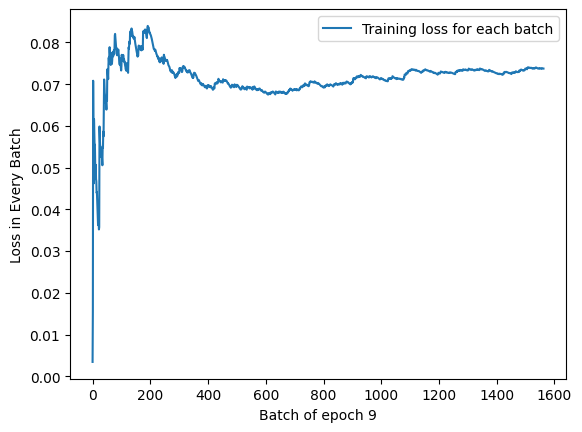

In [17]:
model = get_mnist_model()
model.compile(
    optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.fit(train_data, train_labels, epochs = 10, callbacks =  [LossHistory()], validation_data = [val_data, val_labels])
test_metrics = model.evaluate(test_data, test_labels)

print("The accuracy of the model with early stopping is ", test_metrics[1]*100)

In [18]:
model = get_mnist_model()
model.compile(
    optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

tensorBoard = keras.callbacks.TensorBoard(
    log_dir = "/Logs"
)

model.fit(train_data, train_labels, epochs = 10, callbacks =  [tensorBoard], validation_data = [val_data, val_labels])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.4546 - val_accuracy: 0.9565 - val_loss: 0.1473
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9511 - loss: 0.1681 - val_accuracy: 0.9668 - val_loss: 0.1217
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9624 - loss: 0.1339 - val_accuracy: 0.9733 - val_loss: 0.1031
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1179 - val_accuracy: 0.9722 - val_loss: 0.1061
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9707 - loss: 0.1048 - val_accuracy: 0.9744 - val_loss: 0.1011
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0903 - val_accuracy: 0.9769 - val_loss: 0.0956
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0898 - val_accuracy: 0.9764 - val_loss: 0.1004
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0859 - 

In [21]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir /logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
#Low-level use of metrics

values = [0,1,2,3,4,5]

mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result()}:.2f")
mean_tracker

Mean of values: 2.5:.2f


<Mean name=mean>